In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("../../preprocessed_data/preprocessed_ids2018_subset_after_research.csv")

# Select the three representative features
features = ['Tot Fwd Pkts', 'Flow Byts/s', 'Pkt Len Mean']

# Quick check
print(df[features].describe())


       Tot Fwd Pkts   Flow Byts/s  Pkt Len Mean
count  2.098077e+06  2.098077e+06  2.098077e+06
mean   3.966270e-01  9.151232e-04  2.166446e-01
std    2.876947e-01  2.703510e-02  2.969300e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.519894e-01  0.000000e+00  2.240143e-05
50%    2.519894e-01  5.034954e-07  1.063172e-01
75%    7.334218e-01  2.428080e-06  2.267697e-01
max    1.000000e+00  1.000000e+00  1.000000e+00


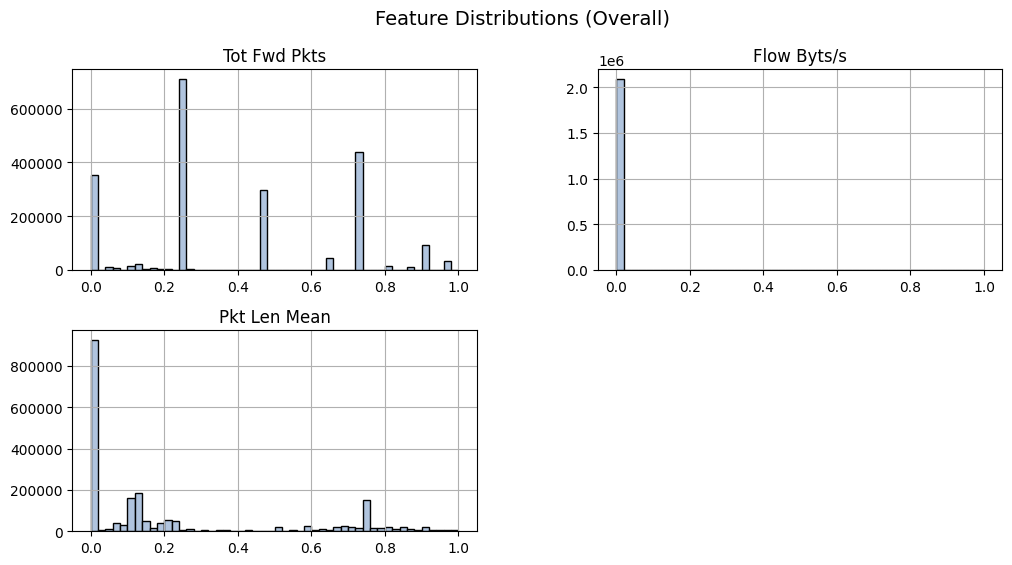

In [2]:
# Plot Histograms for overall distributions
# A histogram shows how often different ranges of values appear in your data.
# It divides a numeric feature (like Flow Byts/s) into small intervals (called bins) and counts how many records fall into each.

# Think of it as ----> “How many network flows had a total byte rate between 0–1000, 1000–2000, 2000–3000, etc.?”

# It shows whether the feature is normally distributed or skewed.
# Helps detect outliers (abnormally high or low values).
# Lets you see if features have wide ranges that may need scaling or log transformation.


# Example interpretation:

# If your histogram for Flow Byts/s has a long right tail (many small values, few very large ones):
# → it means most traffic flows are small, but a few are huge — typical of DDoS or data exfiltration attacks.
# That’s a pattern the model can learn later.


df[features].hist(bins=50, figsize=(12,6), color='lightsteelblue', edgecolor='black')
plt.suptitle("Feature Distributions (Overall)", fontsize=14)
plt.show()


C:\Users\x2025fph\AppData\Local\Temp\ipykernel_2924\1359477806.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feat, data=df, palette='Set2')


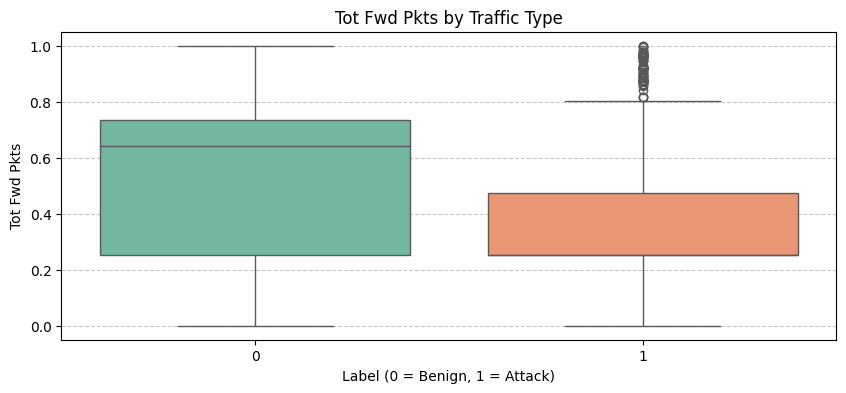

C:\Users\x2025fph\AppData\Local\Temp\ipykernel_2924\1359477806.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feat, data=df, palette='Set2')


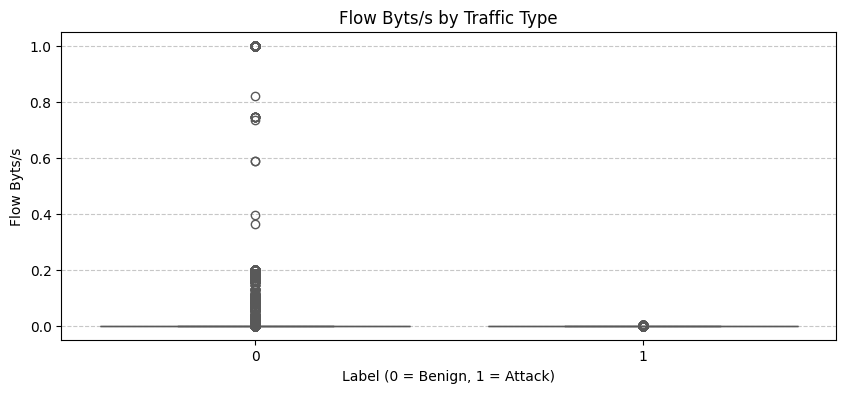

C:\Users\x2025fph\AppData\Local\Temp\ipykernel_2924\1359477806.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=feat, data=df, palette='Set2')


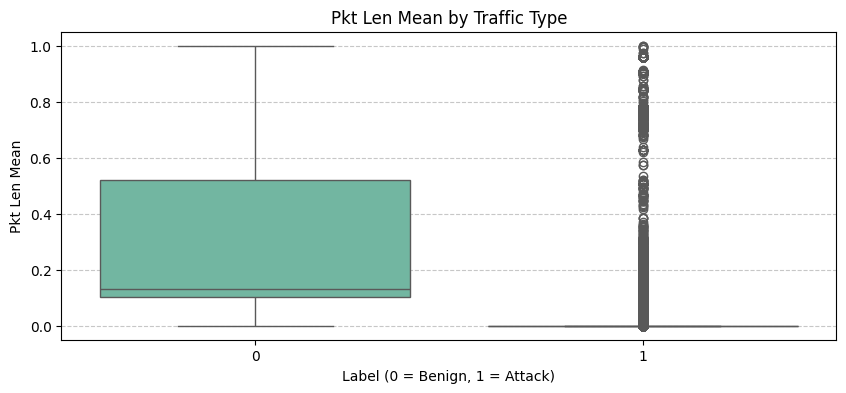

In [3]:
# Compare by Class (Boxplots)

# A boxplot summarizes a numeric feature using five statistics:

# Minimum
# 25th percentile (Q1)
# Median (Q2)
# 75th percentile (Q3)
# Maximum

# and shows outliers as dots.

# When you plot it by class (like Label = Benign vs Attack), you can directly compare how the feature differs between the two.


# Why we use it in IDS EDA:

# Quickly compares feature distributions between benign and malicious traffic.
# Shows median difference — if attack traffic typically has higher/lower values.
# Highlights variability (how spread out the data is).
# Easy to spot features that help separate classes.


# Example interpretation:

# If in the boxplot for Tot Fwd Pkts the attack class has a much higher median than benign, then we can conclude:
# “Attack flows typically have more forward packets per connection — this feature may be important for classification.



for feat in features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='Label', y=feat, data=df, palette='Set2')
    plt.title(f"{feat} by Traffic Type")
    plt.xlabel("Label (0 = Benign, 1 = Attack)")
    plt.ylabel(feat)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Histograms → give a global view of how traffic behaves overall.
Boxplots → help to see how benign vs. attack traffic differ for each feature.

Together, they let you identify which features are worth keeping and which might need transformation or scaling before modeling.